In [12]:
#using Pkg
#Pkg.add("Colors")
#Pkg.add("WGLMakie")
#Pkg.add("Colors")

using Colors
#using GLMakie
#using GLMakie.AbstractPlotting
using WGLMakie
using WGLMakie.AbstractPlotting

AbstractPlotting.inline!(true)

   Updating registry at `C:\Users\szilard\.julia\registries\General`
  Resolving package versions...
Updating `C:\Users\szilard\.julia\environments\v1.5\Project.toml`
  [5ae59095] + Colors v0.12.4
No Changes to `C:\Users\szilard\.julia\environments\v1.5\Manifest.toml`


false

In [2]:
#using Plots
using ColorSchemes

delta = 2
arity = 4

#neighborhood = [(1,0), (1,1), (0,1), (-1,0), (-1,-1), (0,-1)]

neighborhood = [[1,0], [1,1], [0,1], [-1,0], [-1,-1], [0,-1]]

drawCount = 50

sigma = [1,2,1,2,3,1,2,1,3,3,2,1,1,2]

transcript = ["0","6","8","5","7","2","4","1","4","2","7","5","8","5","7","2","7","0","0"]

#beads = Dict([((0,0),["0",[]]), ((-1,0),["2",[]]), ((0,1),["0",[]])])

#beads = Dict([((0,0),["0",[]]), ((-1,0),["2",[]]), ((1,1),["2",[]]), ((0,1),["2",[]]), ((1,0),["2",[]]), ((-1,-1),["2",[]])])
#Dict([((0,1),["0",[]]),((0,2),["0",[]]),((-1,1),["0",[]]),((-1,0),["0",[]])])

beads = Dict()

dirs = [[1,0], [0,1], [-1,1], [-1,0], [0,-1], [1,-1]]

#hood =        [          (-2,2),   (-1,2),   (0,2),
#                     (-2,1),  (-1,1),   (0,1),    (1,1),
#                 (-2,0),  (-1,0),   (0,0),    (1,0),   (2,0),
#                     (-1,-1), (0,-1),   (1,-1),   (2,-1),
#                          (0,-2),   (1,-2),   (2,-2)]


hood =        [          [-2,2],   [-1,2],   [0,2],
                     [-2,1],  [-1,1],   [0,1],    [1,1],
                 [-2,0],  [-1,0],   [0,0],    [1,0],   [2,0],
                     [-1,-1], [0,-1],   [1,-1],   [2,-1],
                          [0,-2],   [1,-2],   [2,-2]]


perimeter = [hood[1], hood[2], hood[3], hood[7], 
             hood[12], hood[16], hood[19], hood[18], 
             hood[17], hood[13], hood[8], hood[4]]

initpath1 = [(0,0),(1,0), (1,1)]
initpath2 = [(0,0),(1,0), (0,-1)]
initpath3 = [(0,0),(1,0), (2,0), (2,1)]

#currentpath = []
#testpath = [np.array((0,1)),np.array((1,0)),np.array((1,-1)),np.array((0,-1)),np.array((-1,0)),np.array((-1,1)),np.array((0,0))]

gridp = [[-2, 0], [-2, 1], [-2, 2], [-1, -1], [-1, 0], [-1, 1], [-1, 2], [0, -2], [0, -1], [0, 0], [0, 1], 
    [0, 2], [1, -2], [1, -1], [1, 0], [1, 1], [2, -2], [2, -1], [2, 0] ]

shear = [1 -0.5;0 sqrt(3)/2]

rules = Dict([("0",["0","1"]),("1",["0","1"]),("2",[])])

gliderfile = "AUrisim-master\\glidersample.auri.txt"
pyramidfile = "AUrisim-master\\pyramidsample.auri.txt"
bincountfile = "AUrisim-master\\binCount.auri.txt"

"AUrisim-master\\binCount.auri.txt"

In [3]:
function fold(scene, path, labels, trlength)
    # FIRST STABILIZATION
    #***************************************
    tmp = findFirstFast(path[end],append!([os[3][end][1]], transcript[1:delta]))

    # findFirstFast returns with an array containing elements [path,bondset-per-bead,strength-of-elongation]
    if tmp != []
        beads[tmp[1][1][2]] = [transcript[1],[]]

        for bond in tmp[1][2][1][1]
                push!(beads[tmp[1][1][2]][2], tmp[1][1][2].+bond)
        end
        push!(path,tmp[1][1][2])
        push!(labels, transcript[1])
    else
        println("Stop bead: ", 1, "  Position: ", path[end])
    end


    # STABILIZATION AFTER FIRST BEAD
    #***************************************
    period = length(transcript)
    append!(transcript,transcript[1:delta])

    for i=0:max(length(transcript)-delta, trlength)

        tmptr = transcript[1+mod(i,period):1+mod(i,period)+delta]

        tmp = findFirstFast(path[end],tmptr)

        if tmp != []
            beads[tmp[1][1][2]] = [tmptr[2],[]]

            for bond in tmp[1][2][1][1]
                if tmp[1][1][2].+bond in keys(beads)
                    push!(beads[tmp[1][1][2]][2], tmp[1][1][2].+bond)
                end
            end
            push!(path,tmp[1][1][2])
            push!(labels, tmptr[2])
        else
            println("Stop bead: ", i, "  Position: ", path[end], "  Transcript window: ", tmptr)
            break
        end
    end

    plotPath2(scene, path, labels)
end


fold (generic function with 1 method)

In [4]:
function plotPath(scene, fpath, fcolored, labels=[], anim=false, bonds=[])
    tmp1 = []
    minx = maxx = fpath[1][1]
    miny = maxy = fpath[1][2]
    fbeadtypes = Dict()
    fbeadtypecount = 0
    fcolorpath = []
    if fcolored == true
        fcolors = colorschemes[:tab20]
        for i=1:length(fpath)
            if fpath[i][1] < minx
                minx = fpath[i][1]
            elseif fpath[i][1]>maxx
                maxx = fpath[i][1]
            end
            if fpath[i][2] < miny
                miny = fpath[i][2]
            elseif fpath[i][2]>maxy
                maxy = fpath[i][2]
            end
        end
        if labels != []
            for i=1:length(fpath)
                if !(labels[i] in keys(fbeadtypes))
                    fbeadtypes[labels[i]] = fbeadtypecount+1
                    fbeadtypecount += 1
                end
                push!(fcolorpath, fcolors[1+mod(fbeadtypes[labels[i]],20)])
            end
        end
    end

    for i=1:length(fpath)
        push!(tmp1,shear*[fpath[i][1],fpath[i][2]])
    end
    
    tmp = [Point2f0(bead[1], bead[2]) for bead in tmp1]
    lines!(scene, tmp, color = RGBA(0.1,0.1,0.1,0.8), linewidth = 3)
    scatter!(scene, tmp, 
        color = fcolorpath,
#        size = (1800, 800),
#        aspect_ratio=:equal, 
#        grid=false, 
        marker = :hexagon,
        markersize = 7,
#        xlims = (minx-1,maxx+3),
#        ylims = (miny-1,maxy+3),
#        xticks = 0:1:10,
#        linealpha = 0.5,
#        linewidth = 3,
#        linecolor = RGBA{Float32}(0.10,0.10,0.10,1)
        )
#        linecolor = :black)
    for bead in keys(beads)
        for bond in beads[bead][2]
            push!(bonds, [bead, bond])
        end
    end
    
    for bond in bonds
        from = Point2f0(shear*bond[1])
        to = Point2f0(shear*bond[2])
#        pl = plot!([tmp1[1],tmp2[1]], [tmp1[2],tmp2[2]],
        pl = linesegments!(scene, [from+(to-from)/3, to - (to-from)/3],
#            [tmp1[1]+(tmp2[1]-tmp1[1])/3,tmp1[1]+2*(tmp2[1]-tmp1[1])/3], [tmp1[2]+(tmp2[2]-tmp1[2])/3,tmp1[2]+2*(tmp2[2]-tmp1[2])/3]            
            color = :red,
#            linewidth = 1,
#            linecolor = :red,
#            legend = false
        )
    end
    if anim == false
        display(scene)
    end
end

plotPath (generic function with 4 methods)

In [5]:
function loadOS(file)
    io = open(file, read=true)
    f = read(io,String)
    close(io)

    os = split(f,"\n")

    fdelta = parse(UInt8, os[1])

    farity = parse(UInt8, os[2])

    fseed = []

    for fbeadstr in split(os[3],"->")
        fbead = split(fbeadstr,",")
        push!(fseed,[string(fbead[1]), parse(Int, fbead[2]), parse(Int, fbead[3])])
    end
    
    for fbead in fseed
        beads[[fbead[2],fbead[3]]] = [fbead[1],[]]
    end
    
    ftranscript = split(strip(os[4]),",")

    frules = Dict{String, Array{String}}()
    for frule in split(os[5],",")
        sides = split(frule, "=")
        if haskey(frules, sides[1])
            push!(frules[sides[1]], sides[2])
        else
            frules[sides[1]] = [sides[2]]
        end

        if haskey(frules, sides[2])
            push!(frules[sides[2]], sides[1])
        else
            frules[sides[2]] = [sides[1]]
        end
    end
    
    return [fdelta, farity, fseed, ftranscript, frules, beads]
end

loadOS (generic function with 1 method)

In [6]:
function genComb(n, k)
	if n < k || k < 0
		return []
    end
	index = k
	combos = []
	comb = []

	for i=1:k
		push!(comb,i)
    end
    push!(combos,copy(comb))

	while index > 0
		if comb[index] < n-k+index
			comb[index] += 1
			for i=index+1:k
				comb[i] = comb[i-1] + 1
            end
			push!(combos,copy(comb))
			index = k
		else
			index -= 1
        end
    end
	return combos
end

# generate all combinations of k elements from set, using genComb(|set|, k) above
function genCombSet(set,k)
	tmp = genComb(length(set), k)
	combos = []
	comb = []
	for i in tmp
		comb = []
		for j in i
			push!(comb,set[j])
        end
        push!(combos,copy(comb))
    end
	return combos
end

# generate Cartesian power k of set, recursively
function genCartPower(set, k)
	cart = []
	if set == [] || k == 0
		return [[]]
    end
	tmp = genCartPower(set, k-1)
	for i in set
		for j in tmp
			push!(cart,push!(copy(j),i))
        end
    end
	return cart
end

# generate Cartesian product of sets, recursively
function genCart(sets)
	cart = []
	if sets == [] #|| getkey(sets,[],'x')=='x'
		return [[]]
    end
	tmp = pop!(sets)
	tmp2 = genCart(sets)

	for i in tmp
		for j in tmp2
			push!(cart,append!([i],j))
        end
    end
	return cart
end


function generateDeltaPathFast(path, trans)
	dpath = [[copy(path)]]
	for i=1 : delta - length(path)+1
		push!(dpath,[])
		for j in dpath[i]
			for dir in neighborhood
				if !(haskey(beads,last(j).+dir) || last(j).+dir in j)
					push!(dpath[i+1], push!(copy(j),last(j).+dir))
                end
            end
        end
    end
	return last(dpath)
end








generateDeltaPathFast (generic function with 1 method)

In [7]:
function valid(path, bondset, sol, index, trans)
    if sol==length(bondset)*ones(length(sol))
        #print("true", path, " BONDS ", sol, "\n")
        return true
    end
	tmpBeads = Dict()
    #println(sol, index)
	for bead in path
		for dir in neighborhood
			if bead.+dir in keys(beads)
				tmpBeads[bead.+dir] = [beads[bead.+dir][1], copy(beads[bead.+dir][2])]
            end
        end
    end

	for i=2:index+1
		if !(haskey(rules,trans[i]))
			rules[trans[i]] = []
        end
		tmpBeads[path[i]] = [trans[i],[]]
		for bond in bondset[sol[i-1]]
			push!(tmpBeads[path[i]][2],path[i].+bond)
			if (haskey(tmpBeads,path[i].+bond)) && !(path[i] in tmpBeads[path[i].+bond][2])
				push!(tmpBeads[path[i].+bond][2],path[i])
				if length(tmpBeads[path[i].+bond][2]) > arity
					return false
                end
            end
        end
    end

	for i=2 : index+1
		for bond in bondset[sol[i-1]]
			if i>1 && path[i].+bond == path[i-1]
				return false
            elseif !(haskey(tmpBeads,path[i].+bond))
				return false
            elseif !(tmpBeads[path[i].+bond][1] in rules[trans[i]])
				return false
            end
        end
    end
	return true
end

valid (generic function with 1 method)

In [8]:
function backtrackFastPrime(path, trans, bondset)
	tmp = Dict()
	index = 1
	solutions = []
	sol = []
	bondNo = length(bondset)
	maxstrength = -1
	det = true

	for i=1:delta
		push!(sol,0)
    end

	while index > 0
		if sol[index] <= bondNo - 1
			sol[index] += 1
			strength = 0
			for i = 1:index
				strength += length(bondset[sol[i]])
            end
			if strength + (delta - index) * arity >= maxstrength
				if valid(path, bondset, sol, index, trans)
					if index == delta

						if strength > maxstrength
							maxstrength = strength
							pushfirst!(solutions,copy(sol))
							det = true
                        elseif strength == maxstrength
							if sol[1] == solutions[1][1]
								pushfirst!(solutions, copy(sol))
							else
								det = false
                            end
                        elseif sol[1] == solutions[1][1]
							pushfirst!(solutions,copy(sol))
                        end
					else
						index += 1
						sol[index] = 0
                    end
                end
            end
		else
			index -= 1
        end
    end
	return [maxstrength, solutions, det]
end


backtrackFastPrime (generic function with 1 method)

In [9]:
function backtrackArity5(path, trans)

    solution = []
    strength = 0
    
    
    for i=1:length(path)-1
        push!(solution,[])
    end
    
    tmpBeads = Dict()
    
    for i=2:length(path)
        tmpBeads[path[i]] = [trans[i], []]
        for dir in neighborhood
            if (path[i].+dir in keys(beads)) && (trans[i] in rules[beads[path[i].+dir][1]])
                push!(solution[i-1], dir)
                strength += 1
              
            elseif (path[i].+dir in keys(tmpBeads)) &&  (path[i].+dir != path[i-1])  && (trans[i] in rules[tmpBeads[path[i].+dir][1]])
                push!(solution[i-1], dir)
                ind = findfirst(x -> x == path[i].+dir,path)
                strength += 1
            end
        end
        
    end
    solution = [sort(sol) for sol in solution]
	return [strength, [solution], true]
end


backtrackArity5 (generic function with 1 method)

In [10]:
function findFirstFast(pos, trans)
	det = true
	bondset = [[]]
    tmp = []
	maxstrength = -1
	solutions = []

    paths = generateDeltaPathFast([pos], trans)

    
    if length(paths)>100000
		print(length(paths))
		return []
    end

    if arity < cutoff
        for i = 1 : arity
            bondset = append!(genCombSet(neighborhood, i), bondset)
        end
        for path in paths
            tmp = backtrackFastPrime(path, trans, bondset)
            if tmp[1] > maxstrength
                if tmp[3]
                    maxstrength = tmp[1]
                    pushfirst!(solutions,[path, tmp[2], tmp[1]])
                    det = true
                else
                    det = false
                end
            elseif tmp[1] == maxstrength
                if solutions != []
                    if !(path[2] == solutions[1][1][2])
                        det = false
                    elseif !(tmp[2][1][1] == solutions[1][2][1][1])
                        det = false
                    end
                end
                pushfirst!(solutions,[path, tmp[2], tmp[1]])
            elseif tmp[1] < maxstrength
                push!(solutions,[path, tmp[2], tmp[1]])
            end
        end
        if det
            tmp = []
            for sol in solutions
                if sol[1][2] == solutions[1][1][2]
                    push!(tmp,sol)
                end
            end
            return tmp
        else
            return []
        end
    else
        for path in paths
            tmp = backtrackArity5(path, trans)
            if tmp[1] > maxstrength
                maxstrength = tmp[1]
                pushfirst!(solutions,[path, tmp[2], tmp[1]])
                det = true
            elseif tmp[1] == maxstrength
                if solutions != []
                    if !(path[2] == solutions[1][1][2])
                        det = false
                    elseif !(tmp[2][1][1] == solutions[1][2][1][1])
                        det = false
                    end
                end
                pushfirst!(solutions,[path, tmp[2], tmp[1]])
                #print(solutions)
            elseif tmp[1] < maxstrength
                push!(solutions,[path, tmp[2], tmp[1]])
            end
        end
        if det
            tmp = []
            for sol in solutions
                if sol[1][2] == solutions[1][1][2]
                    push!(tmp,sol)
                end
            end
            return tmp
        else
            return []
        end
    end
end


findFirstFast (generic function with 1 method)

In [18]:
function plotPath2(scene, fpath, labels)

#    for i=1:length(fpath)
#        push!(xpath,shear*[fpath[i][1],fpath[i][2]])
#    end
    xpath = [Point2f0(shear*bead) for bead in fpath]

    fcolors = colorschemes[:tab20]
    fcolorpath = []
    fbeadtypes = Dict()
    fbeadtypecount = 0
    minx = 0
    maxx = 0
    miny = 0
    maxy = 0
    
    
    for i=1:length(fpath)
        if fpath[i][1] < minx
            minx = fpath[i][1]
        elseif fpath[i][1]>maxx
            maxx = fpath[i][1]
        end
        if fpath[i][2] < miny
            miny = fpath[i][2]
        elseif fpath[i][2]>maxy
            maxy = fpath[i][2]
        end
    end
    
    for i=1:length(xpath)
        if !(labels[i] in keys(fbeadtypes))
            fbeadtypes[labels[i]] = fbeadtypecount+1
            fbeadtypecount += 1
        end
    end


    for i=1:length(xpath)
        push!(fcolorpath, 1+mod(fbeadtypes[labels[i]],20))
    end
    
    


    lines!(scene, xpath, color = RGBA(0.1,0.1,0.1,0.8), linewidth = 3)
    scatter!(scene, xpath,
    #        Aspect(1,1),
            color = fcolors[fcolorpath],
    #        colormap = :tab20,
    #        color = :black)
    #        size = (1800, 800),
    #        aspect_ratio=:equal, 
    #        grid=false, 
            marker = :hexagon,
            markersize = 16/(abs(maxx-minx)/70))
    #        xlims = (minx-1,maxx+3),
    #        ylims = (-15,15))
    #        xticks = 0:1:10,
    #        linealpha = 0.5,
    #        linewidth = 3,
    #        linecolor = RGBA{Float32}(0.10,0.10,0.10,1)

    #ylims!(oritatami,(-10,10))
    
    bonds = []
    
    for bead in keys(beads)
        for bond in beads[bead][2]
            push!(bonds, [bead, bond])
        end
    end
    
    for bond in bonds
        from = Point2f0(shear*bond[1])
        to = Point2f0(shear*bond[2])
#        pl = plot!([tmp1[1],tmp2[1]], [tmp1[2],tmp2[2]],
        linesegments!(scene, [from+(to-from)/3, to - (to-from)/3], color = :red)
    end
#    if anim == false
#        display(scene)
#    end
    
    ylims!(scene, (miny-(maxx-minx-2*maxy+2*miny)/2, maxy + (maxx-minx-2*maxy+2*miny)/2))
    display(scene)
end

plotPath2 (generic function with 1 method)

In [19]:
# TESTING THE ARITY 5 SPECIAL SUBROUTINE
cutoff = 5    # if arity < cutoff then the usual backtracking applies, otherwise the faster algorithm for arity 5

beads = Dict()

#os = loadOS(pyramidfile)
#os = loadOS(gliderfile)
os = loadOS(bincountfile)

# seed added to beads[] by loadOS

delta = os[1]
arity = os[2]
seed = os[3]
transcript = os[4]
rules = os[5]


#bondset = [[]]
#for i = 1 : arity
#	bondset = append!(genCombSet(neighborhood, i), bondset)
#end
#print("Bondset ", bondset, "\n")


#make the seed into a path for plotting; path is array of pairs [x,y]. labels is the sequence of bead types in seed + transcript
path = [[bead[2], bead[3]] for bead in os[3]]
labels = [bead[1] for bead in os[3]]

oritatami = Scene()

#xs = -pi:0.01:pi
#frequency = Node(3.0) # Node === Observable
#phase = Node(0.0)

#ys = lift(frequency, phase) do fr, ph
#    @. 0.3 * sin(fr * xs - ph)
#end

#lines!(scene, xs, ys, color = :blue, linewidth = 3)

#frequency[] = 9

#oritatami

#plotPath2(oritatami, path, labels)

fold(oritatami, path, labels, 3000)

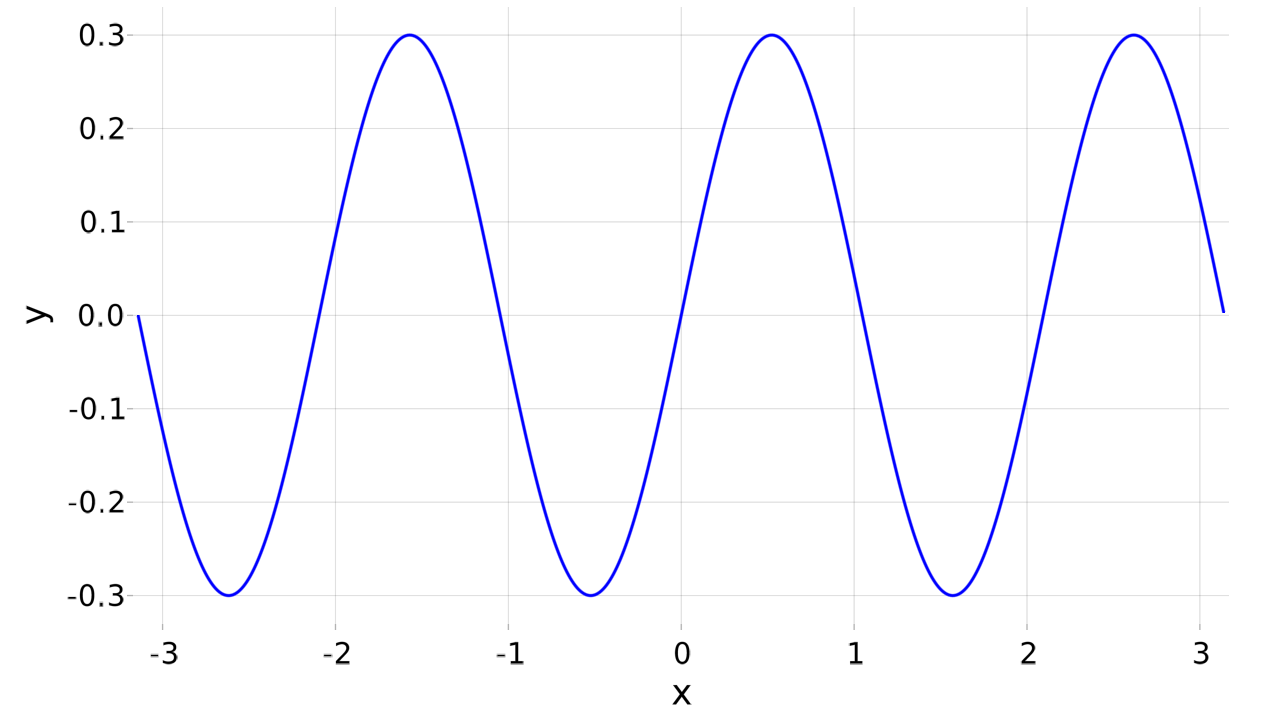

In [13]:
scene = Scene()

xs = -pi:0.01:pi
frequency = Node(3.0) # Node === Observable
phase = Node(0.0)

ys = lift(frequency, phase) do fr, ph
    @. 0.3 * sin(fr * xs - ph)
end

lines!(scene, xs, ys, color = :blue, linewidth = 3)

In [18]:
using WGLMakie
WGLMakie.activate!()